In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"C:\Users\rohan\Downloads\Sample - Superstore.csv",encoding='latin1')
data.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2168,2169,CA-2017-117870,1/27/2017,1/30/2017,Second Class,JH-15820,John Huston,Consumer,United States,Kent,...,44240,East,OFF-AR-10004078,Office Supplies,Art,Newell 312,14.016,3,0.2,1.752


In [6]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
data["Ship Mode"].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

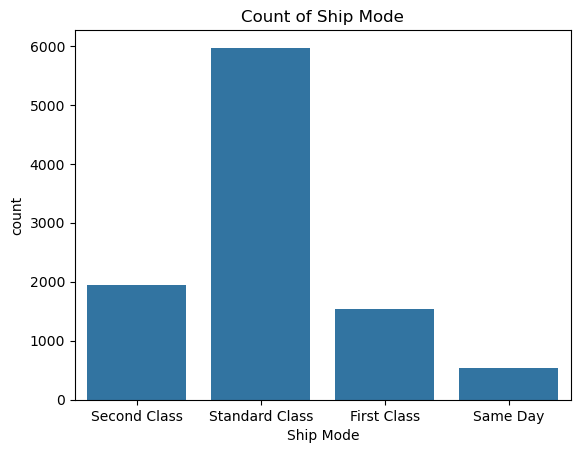

In [10]:
sns.countplot(x="Ship Mode",data=data)
plt.title("Count of Ship Mode")
plt.show()

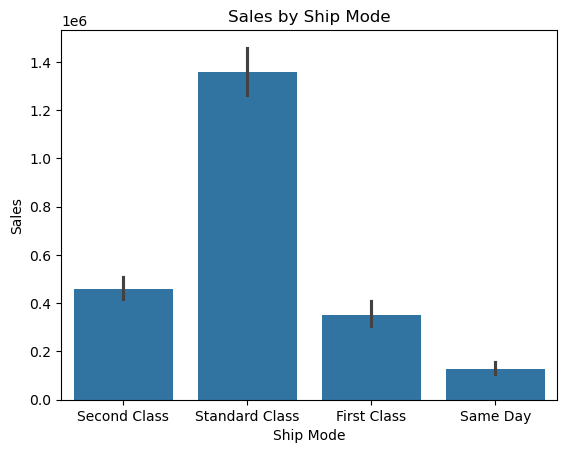

In [20]:
sns.barplot(x="Ship Mode",y="Sales",data=data,estimator="sum")
plt.title("Sales by Ship Mode")
plt.show()

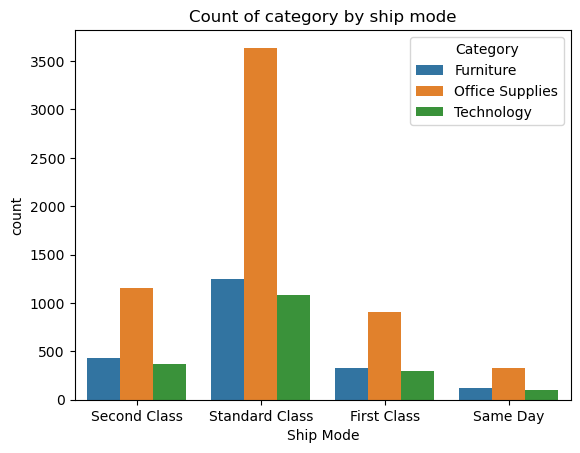

In [22]:
sns.countplot(x="Ship Mode",data=data,hue="Category")
plt.title("Count of category by ship mode")
plt.show()

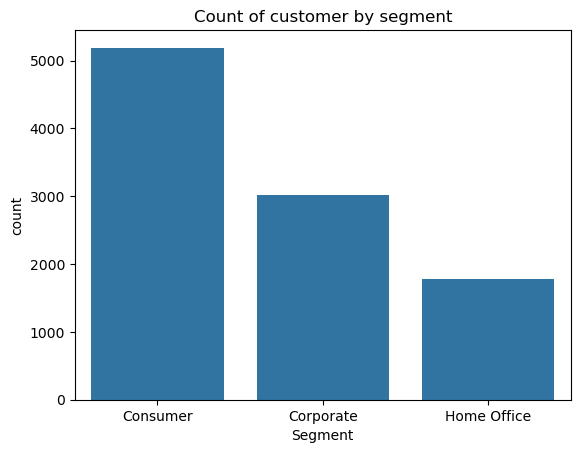

In [23]:
sns.countplot(x="Segment",data=data)
plt.title("Count of customer by segment")
plt.show()

In [ ]:
data.groupby("Segment")["Sales"].sum()

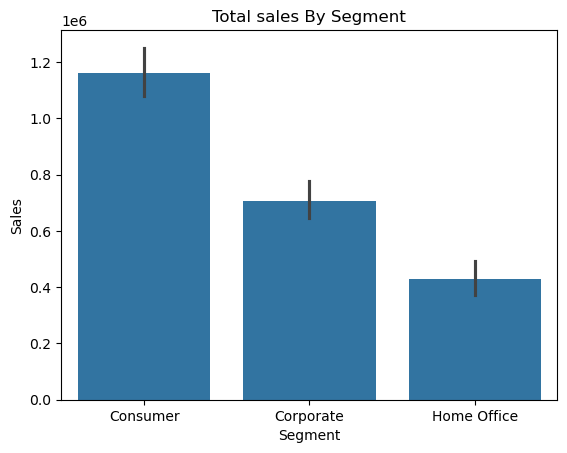

In [71]:
sns.barplot(x="Segment",y="Sales",data=data,estimator="sum")
plt.title("Total sales By Segment")
plt.show()

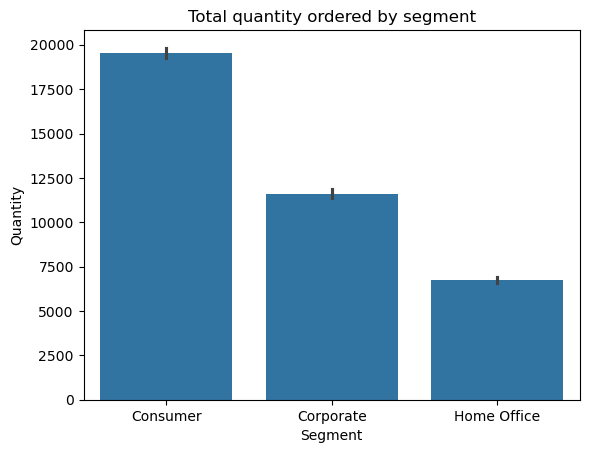

In [29]:
sns.barplot(x="Segment",y="Quantity",data=data,estimator="sum")
plt.title("Total quantity ordered by segment")
plt.show()

In [31]:
data["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

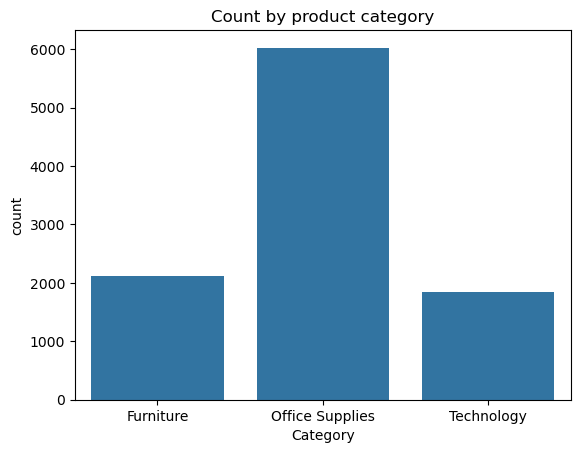

In [32]:
sns.countplot(x="Category",data=data)
plt.title("Count by product category")
plt.show()

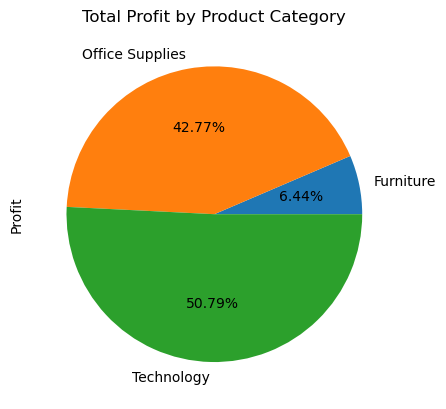

In [53]:
data.groupby("Category")["Profit"].sum().plot(kind="pie",autopct="%0.2f%%")
plt.title("Total Profit by Product Category")
plt.show()

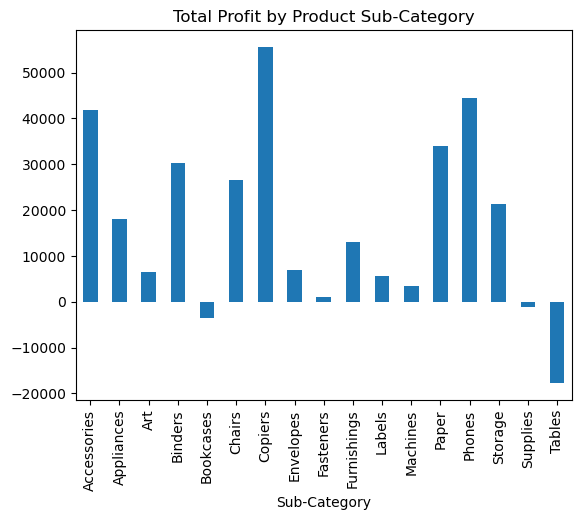

In [54]:
data.groupby("Sub-Category")["Profit"].sum().plot(kind="bar")
plt.title("Total Profit by Product Sub-Category")
plt.show()

In [40]:
data.groupby("Category")["Sales"].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

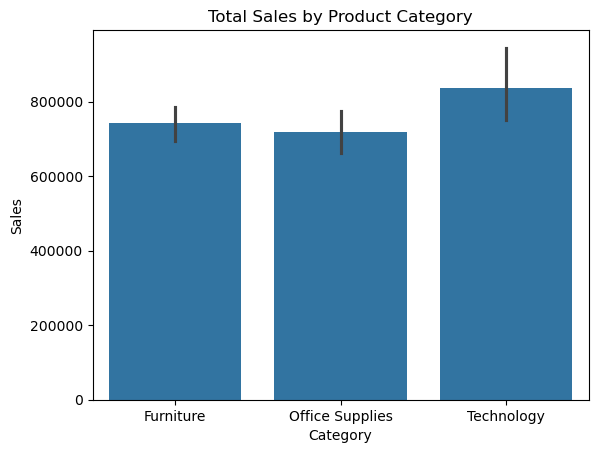

In [39]:
sns.barplot(x="Category",y="Sales",data=data,estimator="sum")
plt.title("Total Sales by Product Category")
plt.show()

In [42]:
data.groupby("State")["Sales"].sum().sort_values(ascending=False).head(3)

State
California    457687.6315
New York      310876.2710
Texas         170188.0458
Name: Sales, dtype: float64

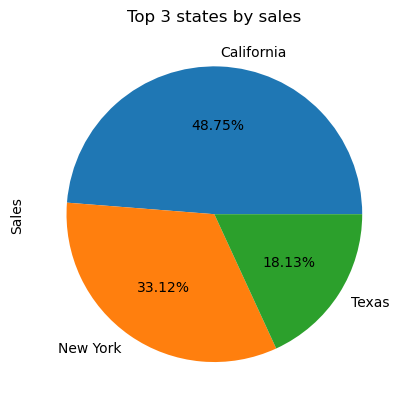

In [45]:
data.groupby("State")["Sales"].sum().sort_values(ascending=False).head(3).plot(kind="pie",autopct="%0.2f%%")
plt.title("Top 3 states by sales")
plt.show()

In [57]:
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [58]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [66]:
data["Months"]=data["Order Date"].dt.month_name()

In [67]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Months
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,November
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,November
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,June
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,October
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,January
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,February
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,February
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,February


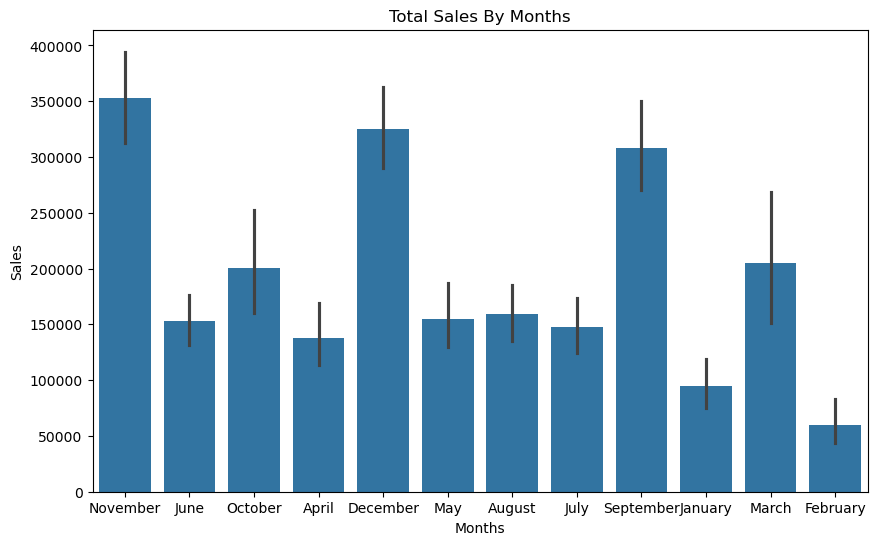

In [70]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x="Months",y="Sales",data=data,estimator="sum")
plt.title("Total Sales By Months")
plt.show()

<Axes: xlabel='Months'>

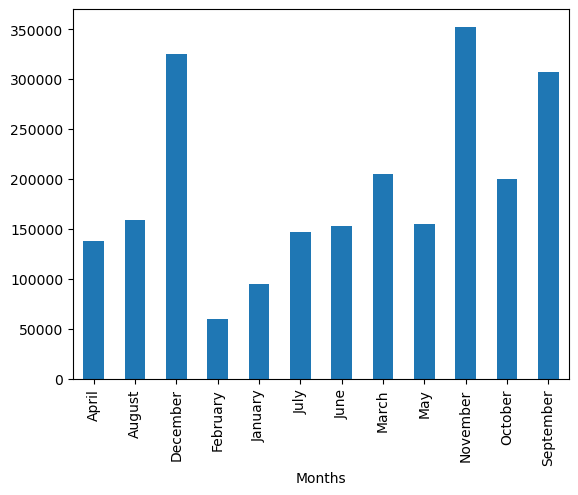

In [74]:
data.groupby("Months")["Sales"].sum().plot(kind="bar")